In [140]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt



df = pd.read_csv("store.csv")
df.head()

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,$54.00
1,MyStore,1,3,2,1,10,Cash,7,-$17.80
2,MyStore,1,3,2,1,10,Card,7,$41.99
3,MyStore,1,3,2,1,11,Card,20,$412.50
4,MyStore,1,3,2,1,12,Cash,1,-$18.00


First, let us clean the data set ready for the analysis. As you can see there is a dollar sign in front of every Amount. This will make it very difficult to perform mathematical operations. As part of the cleaning, we will remove the dollar sign.

In [141]:
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')
df['Amount'] = pd.to_numeric(df['Amount'])
df.head()


C:\Users\xavim\AppData\Local\Temp/ipykernel_20812/3236816959.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')


,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00


Another thing to note is in the Branch name variable, only one branch is seen through out the whole data frame. We therefore do not need this variable. If the data was from different stores we would have need for it. Below we drop the variable from the data frame

In [142]:
df.drop('BranchName',axis=1, inplace=True)
df.head(10)

,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,1,3,2,1,9,Card,3,54.00
1,1,3,2,1,10,Cash,7,-17.80
2,1,3,2,1,10,Card,7,41.99
3,1,3,2,1,11,Card,20,412.50
4,1,3,2,1,12,Cash,1,-18.00
5,1,3,2,1,12,Card,1,-5.00
6,1,3,2,1,12,Card,15,118.50
7,1,3,2,1,13,Cash,90,-94.92
8,1,3,2,1,13,Card,28,423.50
9,1,3,2,1,14,Cash,34,-95.39


Always check out for missing values, fortunately for this datset we have no missing values, This is not always the case and it is important to remember ways to handle missing data that we tackled in the previous task.

In [196]:
# remove rows with empty values
df = df.dropna()
df.tail()

,Survived,Pclass,Sex,Age,Fare,Cabin
1,1,1,female,38.0,71.2833,C85
3,1,1,female,35.0,53.1000,C123
6,0,1,male,54.0,51.8625,E46
10,1,3,female,4.0,16.7000,G6
11,1,1,female,58.0,26.5500,C103


From the histogram below, we can see that the range is -1000 to 1000. Well, it is unusual for the a purchase to total to a negative value. 

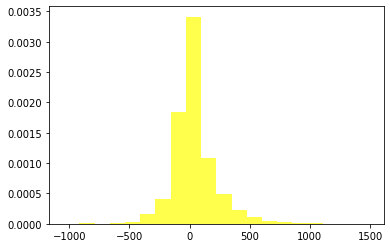

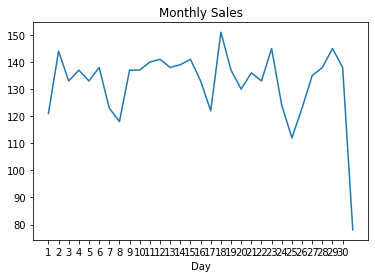

In [144]:

plt.hist(df['Amount'], 20, density =1,facecolor="yellow", alpha=0.7)
plt.show()

test = df['Amount'].groupby(df['Day']).size()
plot_month = test.plot(title = 'Monthly Sales', xticks = (range(1,31)))



In [145]:
positive = df.Amount[df['Amount'] > 0].count()
negative = df.Amount[df['Amount'] < 0].count()
print( 'positive = ', positive,'negative = ', negative)

positive =  1968 negative =  2131


As you can see, there are more negative values for amounts than positive. It now that you investigate from the company why they recored amounts in the negative. Can be transactions made on credit or any other cause that may inform the analysis.

In [146]:
sales_by_card = df.groupby('Transaction_Type').size()

print(sales_by_card)

Transaction_Type
Card    2811
Cash    1289
dtype: int64


###  Sales by Month


Text(0, 0.5, 'Total Sales')

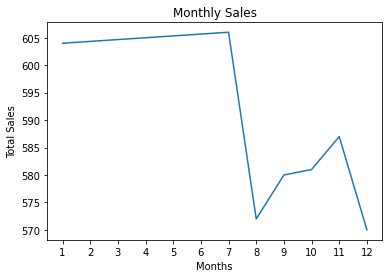

In [147]:
sales_by_month = df.groupby('Month').size()
plot_month = sales_by_month.plot(title = 'Monthly Sales', xticks = (1,2,3,4,5,6,7,8,9,10,11,12))
plot_month.set_xlabel('Months')
plot_month.set_ylabel('Total Sales')



This shows that from January to July the sales were almost steady but then something happened  and the sales declined rapidly. This can show that an investigation needs to be done on what changed around that time. This is how we explore our data and do investigations. Some assumptions would be that we changed hours the store is opened or we changed the vendors and suppliers.

### Sales by Day

Text(0, 0.5, 'Total Sales')

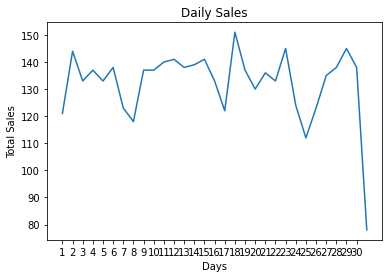

In [148]:
sales_by_month = df.groupby('Day').size()
plot_month = sales_by_month.plot(title = 'Daily Sales', xticks = (range(1,31)))
plot_month.set_xlabel('Days')
plot_month.set_ylabel('Total Sales')

Sales were fluctuating throughout the month but surprisingly there seems to be a significant drop at the end of the month. This is another point to investigate. Common sense dictates that the sales should increase at the end of the month but this happens in the contrary. Finding the reson behind it can be very interesting. Do you have any assumptions?


### Sale by Hour


Text(0, 0.5, 'Total Sales')

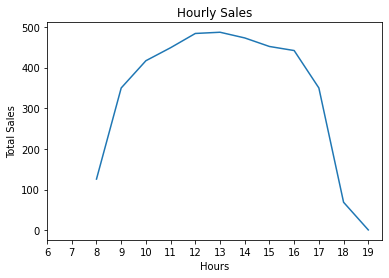

In [149]:
sales_by_month = df.groupby('Hour').size()
plot_month = sales_by_month.plot(title = 'Hourly Sales', xticks = (range(6,20)))
plot_month.set_xlabel('Hours')
plot_month.set_ylabel('Total Sales')

The sales seem to take a bell shape. The sales are highest from 11:00AM to 4:00PM. More customers visit in after noon than closing and opening hours. This can inform the administration on how to do the staffing and all other decisions.


Great, now that we have some back ground in storytelling in EDA now let us begin from the top.


### Exploratory Data Analysis on the Balance data set

We have handled the balance data set before but we only handled missing values. We will now try and do alot more.

According to our rubric, the first step is 

#### 1. What question are you trying to solve (or prove wrong)?

For this data set what we can build is a model that, according to the present variables, can predict the balance of future clients.


#### 2. What kind of data do you have?
Is your data numerical, categorical or something else? How do you deal with each kind?

As we can observe, we have 

Balance - [double][Continuous] The balance in the clients account

Income - [double][Continuous] The clients income.

Limit - [integer][Continuous] This is the credit card limit

Rating - [Double][Continuous] This is the Rating given to a client.

Cards - [Integer][Categorical] This is the number of cards the client 
has

Age -  [Integer][Categorical] This is the age of the client

Education - [Integer] [Categorical]This is the highest level of education attained by the client.

Gender - [String] [Categorical] Male or Female

Student - [String] [Categorical] Yes - the client is a student No - 
Client is not a student

Married -  [String] [Categorical] Yes - Client is married No - client is unmarried.

Ethnicity - [String] [Categorical] client can be Caucasion,Asian or African


In [150]:
balance = pd.read_csv('balance.txt', delim_whitespace=True)
balance.head(10)

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
1,23.283334,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
2,22.530409,104.593,7075,NaN,4.0,71.0,11.0,Male,No,No,Asian
3,27.652811,148.924,9504,681.0,3.0,36.0,11.0,NaN,No,No,Asian
4,16.893978,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian
5,22.486178,80.180,8047,569.0,4.0,77.0,10.0,Male,No,No,Caucasian
6,10.574516,20.996,3388,259.0,2.0,37.0,12.0,Female,No,No,African American
7,14.576204,71.408,7114,512.0,2.0,87.0,9.0,Male,No,No,Asian
8,7.938090,15.125,3300,266.0,5.0,66.0,13.0,Female,No,No,Caucasian
9,17.756965,71.061,6819,491.0,3.0,41.0,19.0,Female,Yes,Yes,African American


#### 3. What’s missing from the data and how do you deal with?

What missing values are there?
Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

<AxesSubplot:>

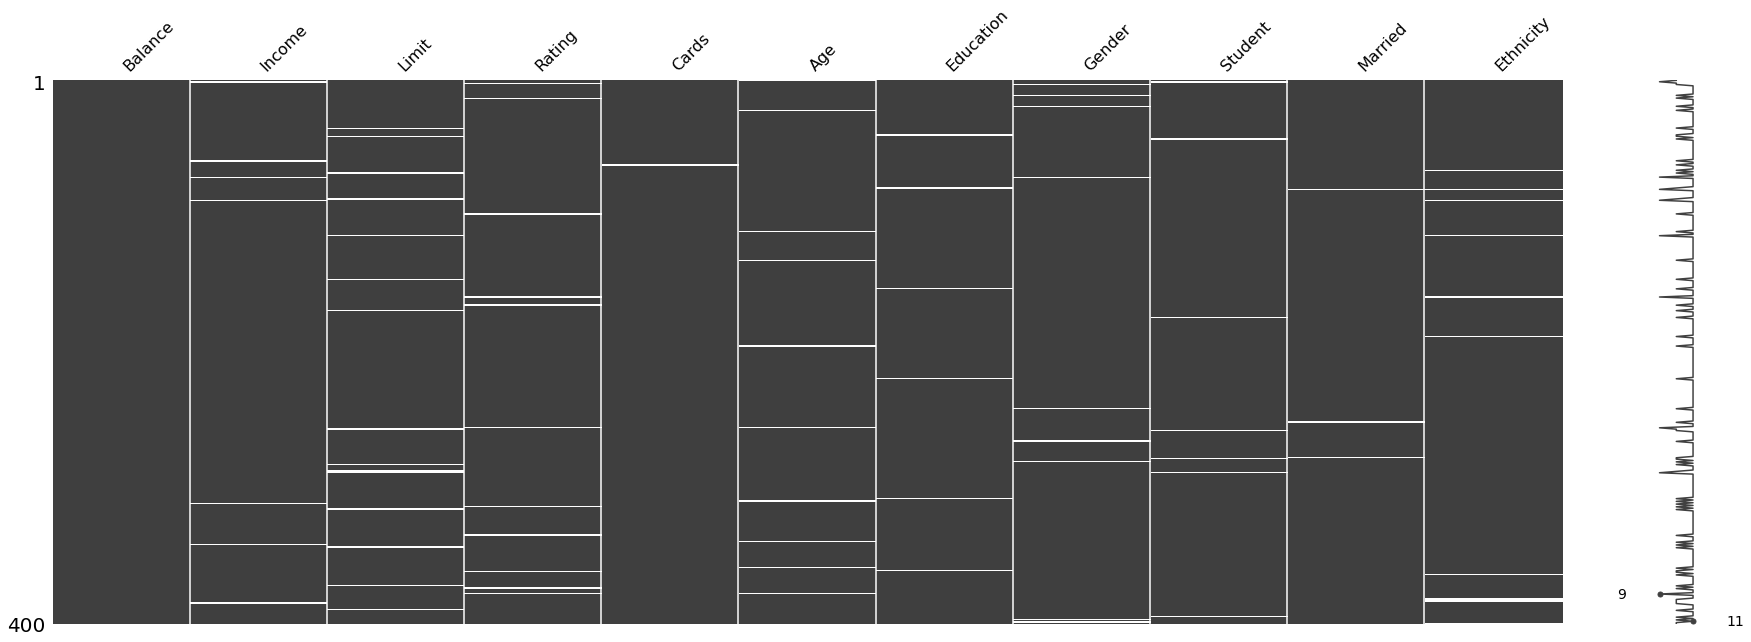

In [151]:
# Plot graphic of missing values
missingno.matrix(balance, figsize = (30,10))

We can now be able to visualise where the data is missing and be able to strategise. We handled missing data in this data set in the previous task so if you need any refreshers refer to the previous task. 

#####  4. Where are the outliers and why should pay attention to them?


#### To perform our data analysis, let's create two new dataframes
We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.



In [152]:
df_bin = balance      # for discretised continuous variables
df_con = balance      # for continuous variables

#### Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models. Some may need more preprocessing than others to get ready.

Female    203
 Male     188
Name: Gender, dtype: int64


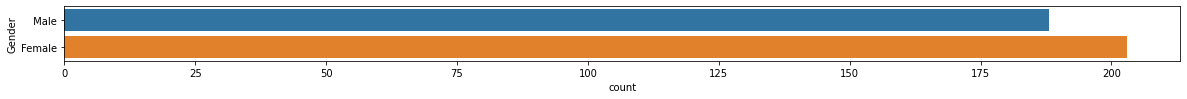

In [153]:
# How many clients are Male and Female
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Gender', data=df_bin);
print(df_bin.Gender.value_counts())

We can see that we have a little more females than male. This could be a coincidence or could be a real representation of the banks client list. Though the difference is not that significant.

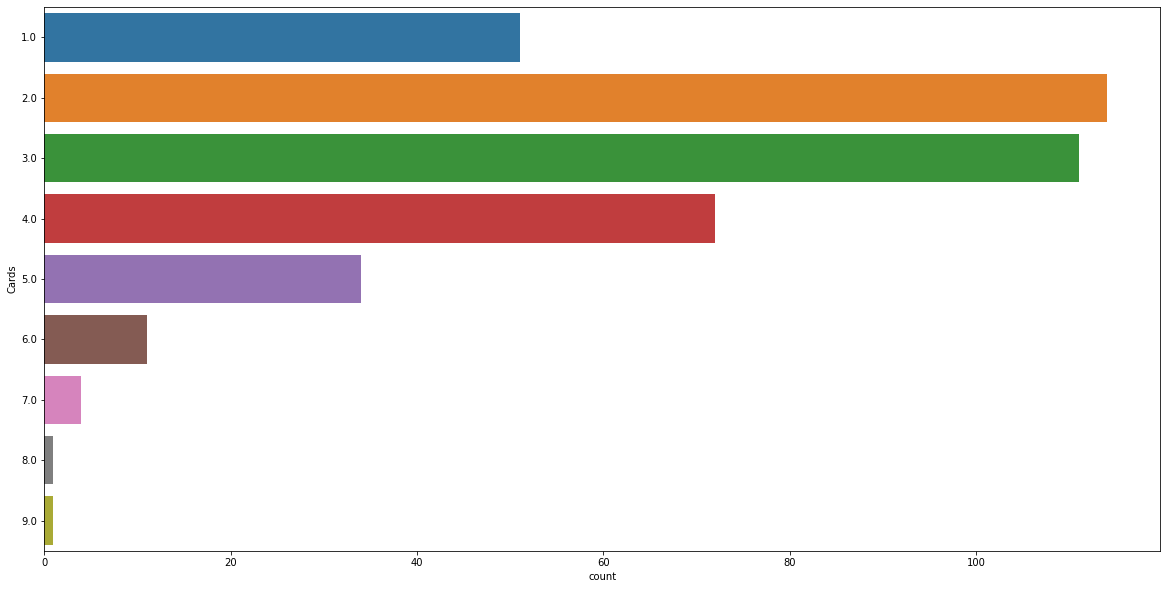

In [154]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_bin['Cards'], data=df_bin);

We can see with this feature, the values are numerical (1, 2 upto 8) but they are categories.

We can deduce that most clients have 2 to three 3 cards. An important thing to note is the average balance or income for every category.




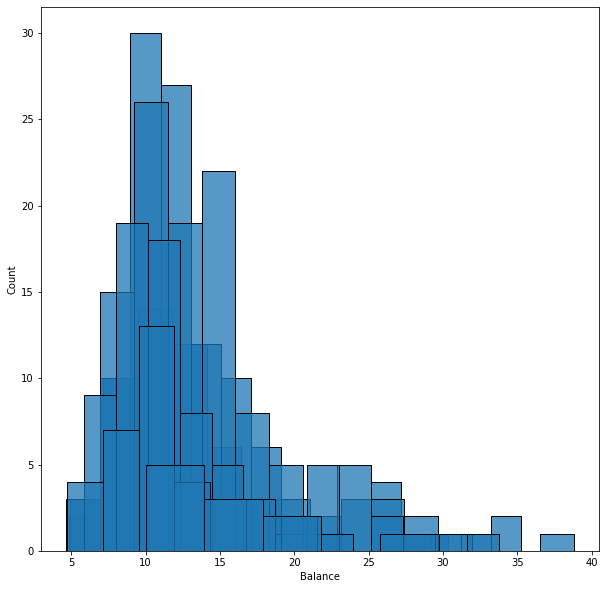

In [155]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Cards'] == 1]['Balance'], kde_kws={'label': 'Cards = 1'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 2]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 3]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 4]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 5]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 6]['Balance'], kde_kws={'label': 'Cards = 2'});




The plot above allows us to see that having different number of cards can be able to describe to us the balance that a client may have. 

In [156]:
## Fill in the same analysis for for the categorical variables 
# Student, Married and Ethnicity with corresponding plots and story lines








#### 5. How can you add, change or remove features to get more out of your data?


Now let us look at the age variable, I would like to say that it is a category variable but it has too many categories. Let up plot this to prove it.

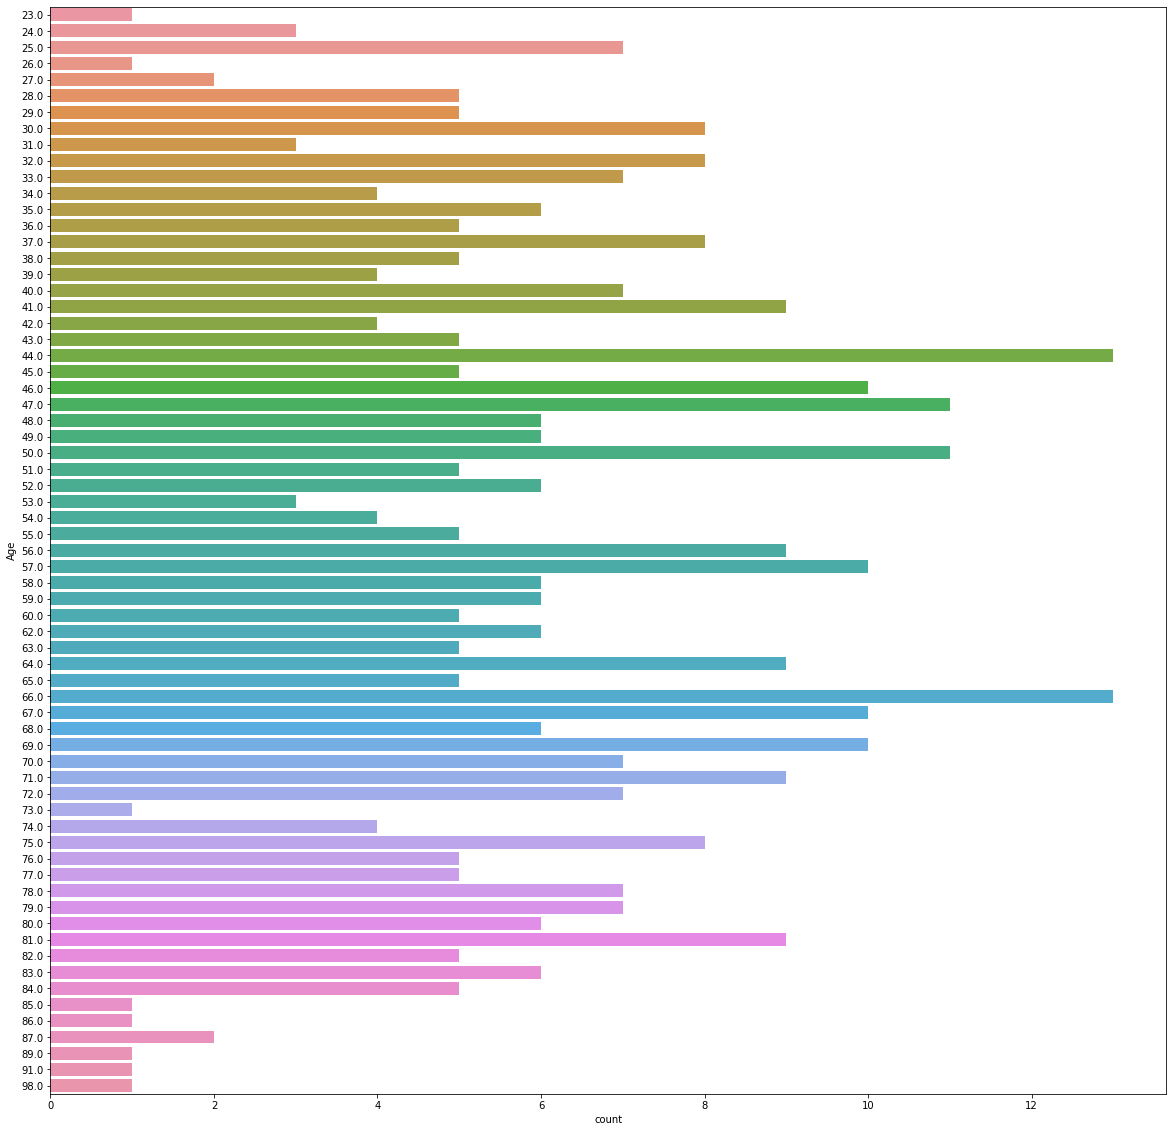

In [157]:
fig = plt.figure(figsize=(20,20))
sns.countplot(y=df_bin['Age'], data=df_bin);

These are so many categories to analyse. Some categorical variables such as this can be put into groups. Since we are dealing with age, let us try and put the clients into age groups. We can do this by putting them into age groups of 10 or 5 years. For this analysis let us do so for 10 years. So we will start with age group 20-29 then 30-39 and so on.

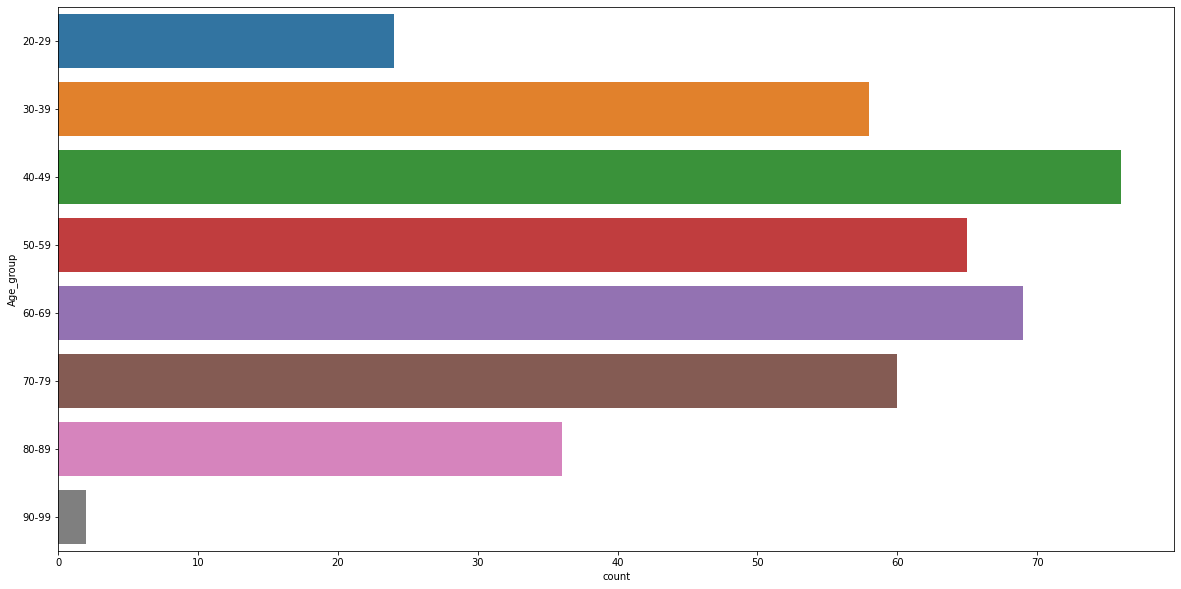

In [158]:
df_bin['Age_group'] = pd.cut(df_bin['Age'], [20, 29, 39,49, 59,69,79,89,99], 
                   labels=['20-29', '30-39', '40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_bin['Age_group'], data=df_bin);


Great! Now the  categories above make more sense and can be used for analysis. The Bank seems to have clients mostly from the ages of 30 to 79. We can do a comparison with the other variables such as number of cards in each age group or even gender but you can do that for practise :)...

We will do the analysis of age groups with Balance and Income.

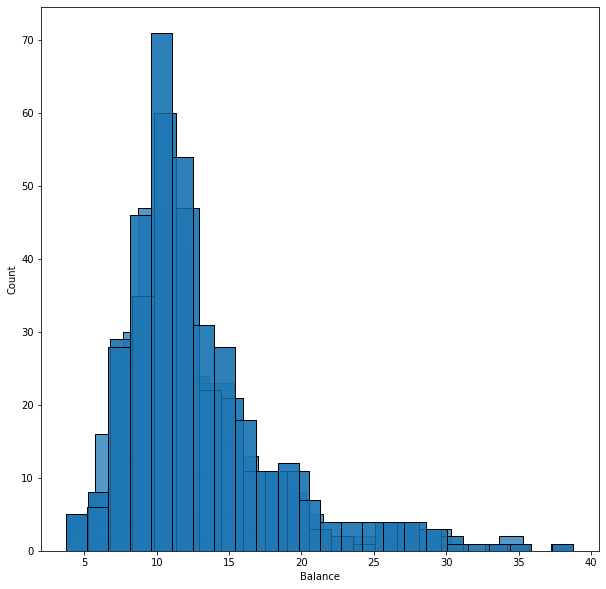

In [159]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Age'] < 29 ]['Balance'], kde_kws={'label': 'Age < 29'});
sns.histplot(df_bin.loc[df_bin['Age'] < 39 ]['Balance'], kde_kws={'label': 'Age < 39'});
sns.histplot(df_bin.loc[df_bin['Age'] < 49 ]['Balance'], kde_kws={'label': 'Age < 49'});
sns.histplot(df_bin.loc[df_bin['Age'] < 59 ]['Balance'], kde_kws={'label': 'Age < 59'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Balance'], kde_kws={'label': 'Age < 69'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Balance'], kde_kws={'label': 'Age < 79'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Balance'], kde_kws={'label': 'Age < 89'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Balance'], kde_kws={'label': 'Age < 99'});




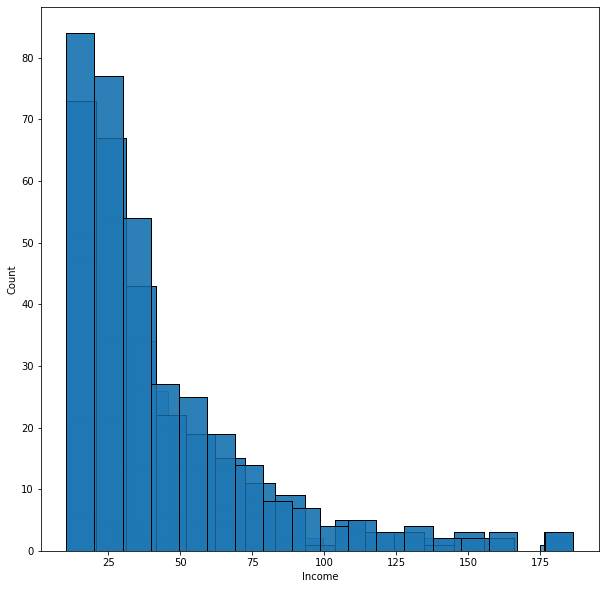

In [160]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Age'] < 29 ]['Income'], kde_kws={'label': 'Age < 29'});
sns.histplot(df_bin.loc[df_bin['Age'] < 39 ]['Income'], kde_kws={'label': 'Age < 39'});
sns.histplot(df_bin.loc[df_bin['Age'] < 49 ]['Income'], kde_kws={'label': 'Age < 49'});
sns.histplot(df_bin.loc[df_bin['Age'] < 59 ]['Income'], kde_kws={'label': 'Age < 59'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Income'], kde_kws={'label': 'Age < 69'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Income'], kde_kws={'label': 'Age < 79'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Income'], kde_kws={'label': 'Age < 89'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Income'], kde_kws={'label': 'Age < 99'});




Clearly different age groups have different ranges of incomes and balances that can be further explored by Gender, Ethnicity and the cycle continues..

#### Ultimately, there’s no limit to the number of experiments one can perform in the EDA process – it completely depends on what you’re analysing, as well as the knowledge of packages such as Pandas and matplotlib our job becomes easier.



## Compulsory Task 

Use the Titanic dataset provided and Go wild with your analysis. Provide an indepth EDA on the data set be creative.

# 1. What question are you trying to solve (or prove wrong)?
For this data set what we can build is a model that, analyses the movie titanic and analyses if what was mentioned was accurate

# 2. What kind of data do we have?

PassengerId - [integer][Continuous] The id of the passenger

Fare - [double][Continuous] The price of ticket

Survived - [integer][Categorical] This is whether they survived or not 1 yes 0 no

PClass - [Integer][Categorical] This is the class of the ticket

Age - [Double] [Categorical]This is the age of the client.

Sex - [String] [Categorical] Male or Female

Name - [String] [Categorical] passengers name

SibSp - [Integer] [Categorical] How many siblings were on board

Cabin - [String] [Categorical] Cabin name

Parch - [Integer] [Categorical] How many parents were on board

Ticket - [String] [Categorical] Ticket name/id

Embarked - [String] [Categorical] Where the client embarked can be C,S or Q

# 3. What’s missing from the data and how do you deal with it?


In [263]:
df = pd.read_csv("Titanic.csv")
# get the number of missing data points per column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We will remove them as otherwise it will affect our results

# 4. Where are the outliers and why should pay attention to them?
isnt any data that are outliers for sure apart from empty fields which we will remove anyway

# 5. How can you add, change or remove features to get more out of your data?
We can add an age_group as there are some ages which are doubles and there are a lot of them

In [265]:
df['Age_group'] = pd.cut(df['Age'], [0, 10, 20, 29, 39,49, 59, 69, 79, 89, 99], 
                   labels=['0-9', '10-19', '20-29', '30-39', '40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20-29
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10-19
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20-29


There is no need for embarked, ticket, parch, sibsp, name or passengerid as these dont affect our graphs

In [266]:
df.drop('Embarked',axis=1, inplace=True)
df.drop('Ticket',axis=1, inplace=True)
df.drop('Parch',axis=1, inplace=True)
df.drop('SibSp',axis=1, inplace=True)
df.drop('PassengerId',axis=1, inplace=True)
df.drop('Name',axis=1, inplace=True)
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Age_group
0,0,3,male,22.0,7.2500,NaN,20-29
1,1,1,female,38.0,71.2833,C85,30-39
2,1,3,female,26.0,7.9250,NaN,20-29
3,1,1,female,35.0,53.1000,C123,30-39
4,0,3,male,35.0,8.0500,NaN,30-39
5,0,3,male,NaN,8.4583,NaN,NaN
6,0,1,male,54.0,51.8625,E46,50-59
7,0,3,male,2.0,21.0750,NaN,0-9
8,1,3,female,27.0,11.1333,NaN,20-29
9,1,2,female,14.0,30.0708,NaN,10-19


Now we will remove empty fields

In [267]:
# remove empty rows
df = df.dropna()
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Age_group
1,1,1,female,38.0,71.2833,C85,30-39
3,1,1,female,35.0,53.1000,C123,30-39
6,0,1,male,54.0,51.8625,E46,50-59
10,1,3,female,4.0,16.7000,G6,0-9
11,1,1,female,58.0,26.5500,C103,50-59
...,...,...,...,...,...,...,...
871,1,1,female,47.0,52.5542,D35,40-49
872,0,1,male,33.0,5.0000,B51 B53 B55,30-39
879,1,1,female,56.0,83.1583,C50,50-59
887,1,1,female,19.0,30.0000,B42,10-19


array([<AxesSubplot:ylabel='Survived'>], dtype=object)

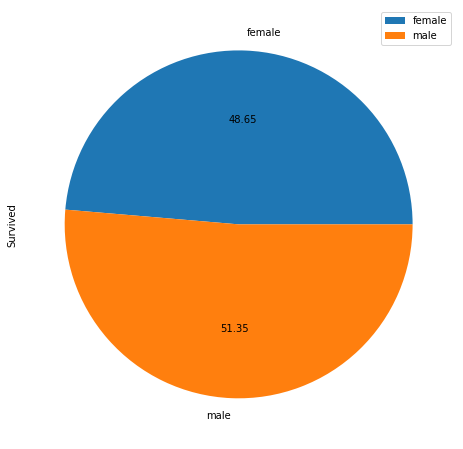

In [268]:
#    did sex affect survival
group_sex = df.groupby(by=['Sex'])

sex_survival = group_sex.count()

sex_survival = pd.DataFrame({'Survived': sex_survival['Survived']})

sex_survival.rename(columns={'Sex': 'Survived'}, inplace=True)

sex_survival.plot.pie(subplots=True,figsize=(8, 8),autopct='%.2f')

It seems that sex didnt really have an effect with almost the same amount of men surviving than women

array([<AxesSubplot:ylabel='Survived'>], dtype=object)

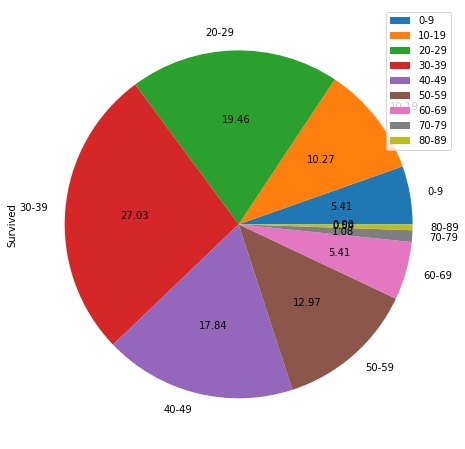

In [270]:
#    which age group had the most survivors
group_age = df.groupby(by=['Age_group'])

age_survival = group_age.count()

age_survival = pd.DataFrame({'Survived': age_survival['Survived']})

age_survival.rename(columns={'Survival': 'Age_group'}, inplace=True)

age_survival.plot.pie(subplots=True,figsize=(8, 8),autopct='%.2f')


27.03% of the survivors were between 30 and 39 years old which was the largest this could have been down to lots of women and people in pclass 1 being in this age group

,Survived,Pclass,Sex,Age,Fare,Cabin
Age_group,,,,,,
0-9,10,10,10,10,10,10
10-19,19,19,19,19,19,19
20-29,36,36,36,36,36,36
30-39,50,50,50,50,50,50
40-49,33,33,33,33,33,33
50-59,24,24,24,24,24,24
60-69,10,10,10,10,10,10
70-79,2,2,2,2,2,2
80-89,1,1,1,1,1,1


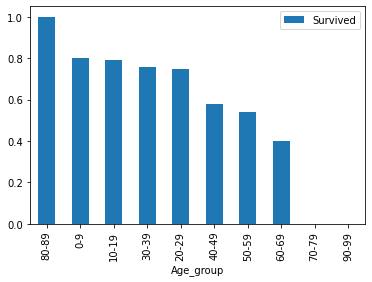

In [275]:
#    which ages had best and worst survival rate
group_age = df.groupby(by=['Age_group'])

age_survival = round(group_age.mean(),2)

age_survival = age_survival.sort_values(by='Survived', ascending = False)

age_survival = pd.DataFrame({'Survived': age_survival['Survived']})

age_survival.rename(columns={'Survival': 'Age'}, inplace=True)

age_survival.plot(kind='bar')

age = group_age.count()

age

80-89 year olds had a 100% survival rate
this was due to them having 1 person in the age range
no one was older than 90 so that had a 0% survival rate and both people aged between 70-79 died meaning it also had 0%
almost 80% of the 50 30-39 year olds survived making it the most impressive

array([<AxesSubplot:ylabel='Survived'>], dtype=object)

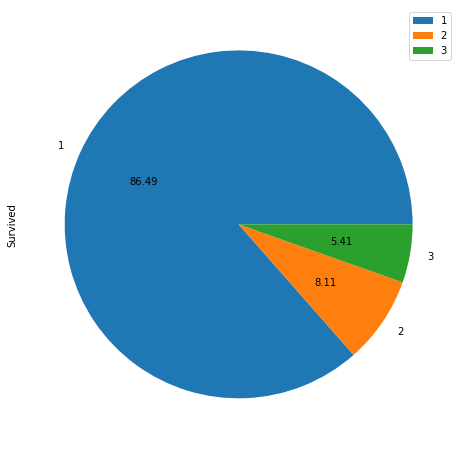

In [276]:
#    did pclass affect survival
group_pclass = df.groupby(by=['Pclass'])

pclass_survival = group_pclass.count()

pclass_survival = pd.DataFrame({'Survived': pclass_survival['Survived']})

pclass_survival.rename(columns={'Pclass': 'Survived'}, inplace=True)

pclass_survival.plot.pie(subplots=True,figsize=(8, 8),autopct='%.2f')

Yes, an astonishing 86.5% of survivers were in pclass 1

<AxesSubplot:xlabel='Pclass'>

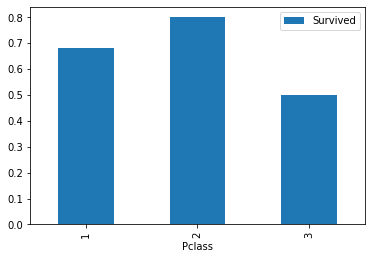

In [277]:
#    What was the survival rate for each pclass
group_pclass = df.groupby(by=['Pclass'])

pclass_survival = round(group_pclass.mean(),2)

pclass_survival = pd.DataFrame({'Survived': pclass_survival['Survived']})

pclass_survival.rename(columns={'Pclass': 'Survived'}, inplace=True)

pclass_survival.plot(kind='bar')

Even though pclass 1 had the most survivors it didnt have the best survival rate pclass 2 did with 80% of people from there surviving. Pclass 1 had a survival rate of around 68% while pclass 3 had on at around 52%

<AxesSubplot:xlabel='Pclass'>

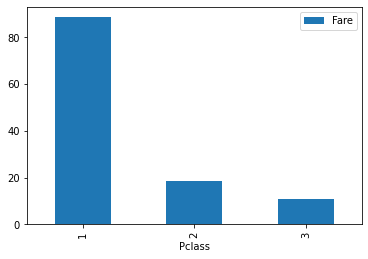

In [278]:
#    did pclass affect fare
group_pclass = df.groupby(by=['Pclass'])

pclass_survival = round(group_pclass.mean(),2)

pclass_survival = pd.DataFrame({'Fare': pclass_survival['Fare']})

pclass_survival.rename(columns={'Pclass': 'Fare'}, inplace=True)

pclass_survival.plot(kind='bar')

pclass 1 had by far the most expensive average fare at over 80 followed by pclass 2 at around 20 and then pclass 3 at around 15 

Fare    14558.9
dtype: float64


array([<AxesSubplot:ylabel='Fare'>], dtype=object)

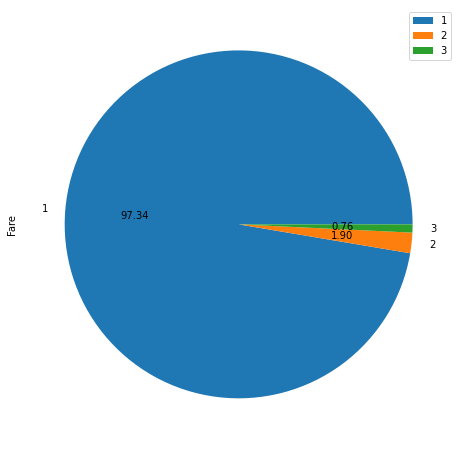

In [279]:
#    which pclass made them the most money
group_pclass = df.groupby(by=['Pclass'])

pclass_survival = round(group_pclass.sum(),2)

pclass_survival = pd.DataFrame({'Fare': pclass_survival['Fare']})

print(pclass_survival.sum())

pclass_survival.rename(columns={'Pclass': 'Fare'}, inplace=True)

pclass_survival.plot.pie(subplots=True,figsize=(8, 8),autopct='%.2f')

97% of the 14558.9 they made in fares was from pclass 1 fares

<AxesSubplot:xlabel='Pclass'>

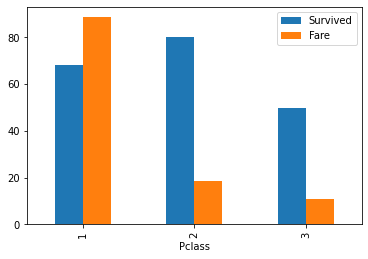

In [280]:
# which pclass was best for money and survival
group_pclass_sf = df.groupby(by=['Pclass'])

pclass_sf = round(group_pclass_sf.mean(),2)

pclass_sf = pd.DataFrame({'Survived': pclass_sf['Survived']*100,
                              'Fare': pclass_sf['Fare']})

#pclass_survival.rename(columns={'Pclass': 'Survived'}, inplace=True)

pclass_sf.plot(kind='bar')

pclass 2 is the best value for money it is far cheaper than pclass 1 and its survival rate is 10% better than it and it has a much better survival rate than pclass 3 and even though its more expensive its only slightly more expensive than pclass 3 for a dramatic increase in survival rate making it in my opinion the best value for money.

Survived    1.380597
dtype: float64


<AxesSubplot:xlabel='Cabin'>

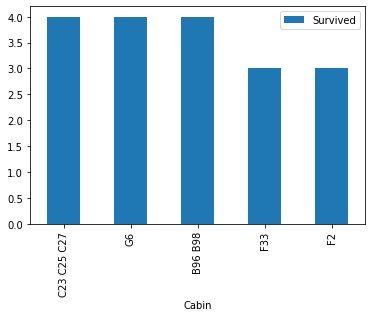

In [281]:
#    which cabin had the most survivors and what was the mean per cabin
group_cabin = df.groupby(by=['Cabin'])

cabin_survival = group_cabin.count()

cabin_survival = pd.DataFrame({'Survived': cabin_survival['Survived']})

print(cabin_survival.mean())

cabin_survival = cabin_survival.sort_values(by='Survived', ascending = False)

cabin_survival = cabin_survival.iloc[:5,]

cabin_survival.rename(columns={'Cabin': 'Survived'}, inplace=True)

#cabin_survival.plot.pie(subplots=True,figsize=(8, 8),autopct='%.2f')
cabin_survival.plot(kind='bar')

cabins : c23, c25, c27, g6, b96 and b98 had 4 survivors each while the average for all was 1.38 survivors per cabin

<AxesSubplot:xlabel='Survived'>

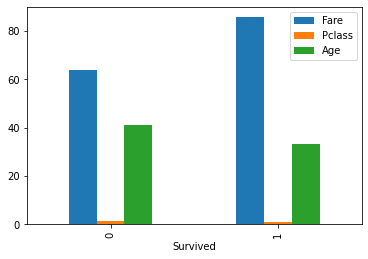

In [282]:
# which factor was the most important for survival
group = df.groupby(by=['Survived'])

survive = round(group.mean(),2)

survive = pd.DataFrame({'Fare': survive['Fare'],
                       'Pclass': survive['Pclass'],
                       'Age': survive['Age']
                       })

#pclass_survival.rename(columns={'Pclass': 'Survived'}, inplace=True)

survive.plot(kind='bar')

fare was the most important as it had the biggest change between surviving and not 

<AxesSubplot:xlabel='Pclass'>

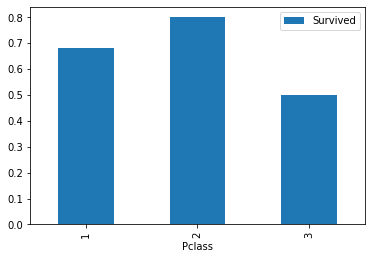

In [283]:
# do the upper class have priority on boats
group_pclass = df.groupby(by=['Pclass'])

pclass_survival = round(group_pclass.mean(),2)

pclass_survival = pd.DataFrame({'Survived': pclass_survival['Survived']})

pclass_survival.rename(columns={'Pclass': 'Survived'}, inplace=True)

pclass_survival.plot(kind='bar')

Even though it doesnt look like it, it seems like they did as 86% of all passengers were in pclass 1 and for 70% of them to survive must mean that they had priority. pclass 3 having a much lower survival rate than both makes sense as they would have got last priority

Survived    0.624444
dtype: float64


<AxesSubplot:xlabel='Age_group'>

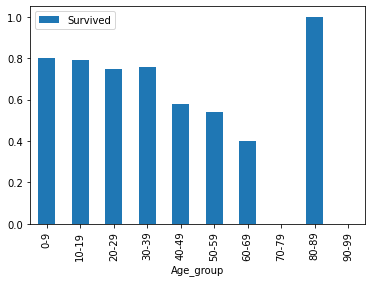

In [285]:
#did children have priority on boats
group_age = df.groupby(by=['Age_group'])

age_survival = round(group_age.mean(),2)

age_survival = pd.DataFrame({'Survived': age_survival['Survived']})

print(age_survival.mean())

age_survival.rename(columns={'Survival': 'Age'}, inplace=True)

age_survival.plot(kind='bar')

yes it seems like it as the survival rate was 62% in total and for people aged between 0 and 19 it was almost 80% which was higher than all but one age range which only had 1 person

array([<AxesSubplot:ylabel='Survived'>], dtype=object)

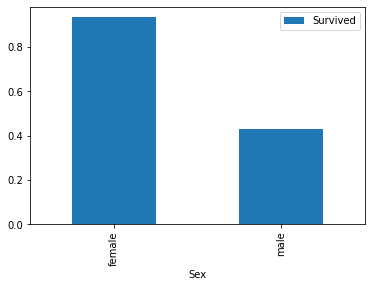

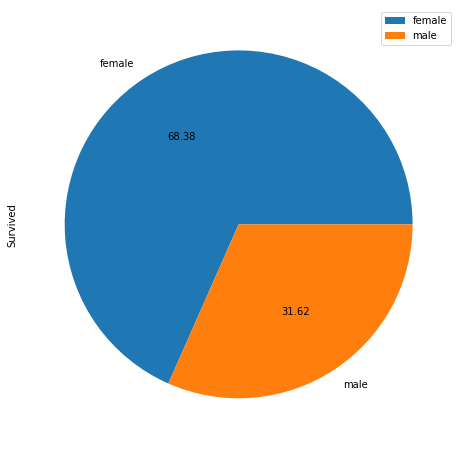

In [286]:
# where women given priority on boats
group_sex = df.groupby(by=['Sex'])

sex_survival = group_sex.mean()

sex_survival = pd.DataFrame({'Survived': sex_survival['Survived']})

sex_survival.rename(columns={'Sex': 'Survived'}, inplace=True)

sex_survival.plot(kind='bar')
sex_survival.plot.pie(subplots=True,figsize=(8, 8),autopct='%.2f')

yes it seems so as almost all women survived while only 20% of males survived and 68% of all survivors were women